In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# import plotly.graph_objects as gp
# import chart_studio.plotly as py
%matplotlib inline
import sweetviz as sv

Matplotlib is building the font cache; this may take a moment.


In [2]:
##loading the data
data =  pd.read_csv('data.csv')
data

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Guildfast Lane,June,Cooper,52,Head,Divorced,Female,Unemployed,None,Christian
1,1,1,Guildfast Lane,Rita,Cooper,10,Daughter,NaN,Female,Student,None,NaN
2,2,2,Guildfast Lane,Melanie,Atkinson,52,Head,Married,Female,"Producer, television/film/video",None,Catholic
3,3,2,Guildfast Lane,Stuart,Atkinson,53,Husband,Married,Male,Aid worker,None,Christian
4,4,3,Guildfast Lane,Donna,Finch,44,Head,Married,Female,Translator,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
10589,10589,1,Edwards Granary,Luke,Robinson,13,Grandson,NaN,Male,Student,None,NaN
10590,10590,1,Edwards Granary,Molly,Roberts,11,Granddaughter,NaN,Female,Student,None,NaN
10591,10591,1,Edwards Granary,Marilyn,Roberts,10,Granddaughter,NaN,Female,Student,None,NaN
10592,10592,1,July Cottage,Robin,Rogers,76,Head,Married,Male,"Retired Sales professional, IT",None,Christian


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10594 non-null  int64 
 1   House Number                   10594 non-null  object
 2   Street                         10594 non-null  object
 3   First Name                     10594 non-null  object
 4   Surname                        10594 non-null  object
 5   Age                            10594 non-null  object
 6   Relationship to Head of House  10594 non-null  object
 7   Marital Status                 7849 non-null   object
 8   Gender                         10594 non-null  object
 9   Occupation                     10594 non-null  object
 10  Infirmity                      10594 non-null  object
 11  Religion                       7803 non-null   object
dtypes: int64(1), object(11)
memory usage: 993.3+ KB


In [4]:
#trim out unneccesary spaces
data_obj = data.select_dtypes(['object'])
data[data_obj.columns] = data_obj.apply(lambda x: x.str.strip())

In [5]:
data['Age'].unique()

array(['52', '10', '53', '44', '46', '13', '12', '19', '30', '39', '38',
       '11', '7', '48', '16', '76', '50', '79', '64', '31', '67', '60',
       '62', '26', '20', '18', '22', '23', '21', '33', '37', '0', '83',
       '5', '1', '35', '59', '34', '27', '41', '55', '57', '17', '54',
       '75', '80', '43', '6', '3', '42', '32', '49', '51', '9', '56',
       '65', '36', '40', '8', '28', '25', '4', '63', '77', '58', '47',
       '84', '2', '45', '61', '81', '84.77995285', '89.77995285', '15',
       '85', '69', '24', '48.79471576', '49.79471576', '14', '66', '29',
       '103', '72', '98', '68', '78', '82', '105', '108', '70', '88',
       '71', '87', '86', '73', '102', '104', '74', '90', '72.58356639',
       '76.23509181', '91', '94', '100', '106', '99', '63.49234533', '89',
       '115', '', '101', '95', '92', '96', '93', '60.47982178',
       '57.47982178', '97', '47.63674446', '46.63674446'], dtype=object)

In [6]:
#replace the empty string with the string '0'
data['Age'].replace([''], '0', inplace = True)

In [7]:
data['Age'].unique()

array(['52', '10', '53', '44', '46', '13', '12', '19', '30', '39', '38',
       '11', '7', '48', '16', '76', '50', '79', '64', '31', '67', '60',
       '62', '26', '20', '18', '22', '23', '21', '33', '37', '0', '83',
       '5', '1', '35', '59', '34', '27', '41', '55', '57', '17', '54',
       '75', '80', '43', '6', '3', '42', '32', '49', '51', '9', '56',
       '65', '36', '40', '8', '28', '25', '4', '63', '77', '58', '47',
       '84', '2', '45', '61', '81', '84.77995285', '89.77995285', '15',
       '85', '69', '24', '48.79471576', '49.79471576', '14', '66', '29',
       '103', '72', '98', '68', '78', '82', '105', '108', '70', '88',
       '71', '87', '86', '73', '102', '104', '74', '90', '72.58356639',
       '76.23509181', '91', '94', '100', '106', '99', '63.49234533', '89',
       '115', '101', '95', '92', '96', '93', '60.47982178', '57.47982178',
       '97', '47.63674446', '46.63674446'], dtype=object)

In [8]:
#change the format of age
data['Age'] = data['Age'].astype(float)
data['Age'] = data['Age'].astype(int)
data['Age']

0        52
1        10
2        52
3        53
4        44
         ..
10589    13
10590    11
10591    10
10592    76
10593    71
Name: Age, Length: 10594, dtype: int32

In [9]:
data[data['Age'] == 0]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
42,42,11,Hall Lane,Stacey,Short,0,Daughter,NaN,Female,Child,None,NaN
43,43,11,Hall Lane,Melanie,Short,0,Daughter,NaN,Female,Child,None,NaN
51,51,13,Hall Lane,Darren,Jones,0,Son,NaN,Male,Child,None,NaN
144,144,28,Mistry Avenue,Shane,Fitzgerald,0,Son,NaN,Male,Child,None,NaN
240,240,4,Thompson Villages,Hilary,Reynolds-Smith,0,Daughter,NaN,f,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10413,10413,6,Metcalfe Port,Tracy,George,0,Daughter,NaN,f,Child,None,NaN
10457,10457,11,Metcalfe Port,Molly,Wilkins,0,Daughter,NaN,Female,Child,None,NaN
10466,10466,13,Metcalfe Port,Clifford,Davis,0,Son,NaN,Male,Child,None,NaN
10526,10526,1,Rhodes Stronghold,Stewart,Thompson,0,Son,NaN,Male,Child,None,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10594 non-null  int64 
 1   House Number                   10594 non-null  object
 2   Street                         10594 non-null  object
 3   First Name                     10594 non-null  object
 4   Surname                        10594 non-null  object
 5   Age                            10594 non-null  int32 
 6   Relationship to Head of House  10594 non-null  object
 7   Marital Status                 7849 non-null   object
 8   Gender                         10594 non-null  object
 9   Occupation                     10594 non-null  object
 10  Infirmity                      10594 non-null  object
 11  Religion                       7803 non-null   object
dtypes: int32(1), int64(1), object(10)
memory usage: 951.9+ KB


In [11]:
#check the columns having the empty string data. first name, Relationship to Head of House, Occupation and Infirmity according to result
print(data[data['House Number'] == ''])
print('-------------------------------------')
print(data[data['Street'] == ''])
print('-------------------------------------')
print(data[data['First Name'] == ''])
print('-------------------------------------')
print(data[data['Surname'] == ''])
print('-------------------------------------')
print(data[data['Relationship to Head of House'] == ''])
print('-------------------------------------')
print(data[data['Marital Status'] == ''])
print('-------------------------------------')
print(data[data['Gender'] == ''])
print('-------------------------------------')
print(data[data['Occupation'] == ''])
print('-------------------------------------')
print(data[data['Infirmity'] == ''])
print('-------------------------------------')
print(data[data['Religion'] == ''])
print('-------------------------------------')

Empty DataFrame
Columns: [Unnamed: 0, House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []
-------------------------------------
Empty DataFrame
Columns: [Unnamed: 0, House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []
-------------------------------------
      Unnamed: 0 House Number            Street First Name Surname  Age  \
2759        2759            4  Armstrong Common              Green   65   

     Relationship to Head of House Marital Status Gender  \
2759                          Head        Widowed   Male   

                     Occupation Infirmity  Religion  
2759  Editor, magazine features      None  Catholic  
-------------------------------------
Empty DataFrame
Columns: [Unnamed: 0, House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gende

In [12]:
data['Relationship to Head of House'].value_counts()

Head                     3460
Son                      1894
Daughter                 1883
Husband                  1060
None                      782
Lodger                    466
Wife                      316
Partner                   284
Granddaughter             104
Grandson                  102
Sibling                    55
Cousin                     42
Visitor                    31
Step-Son                   28
Step-Daughter              27
Adopted Daughter           18
Neice                      16
Adopted Son                12
Nephew                      9
Adopted Granddaughter       2
                            2
Adopted Grandson            1
Name: Relationship to Head of House, dtype: int64

In [13]:
data[data['Relationship to Head of House'] == '']

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10131,10131,13,Simmons Tunnel,Andrew,Clark,38,,Married,Male,"Surveyor, minerals",None,Christian
10392,10392,3,Metcalfe Port,Lydia,Mitchell,52,,Single,Female,"Scientist, product/process development",None,Christian


In [14]:
#change the value of the clark to Husband since the data shows he is married and the female is already the Head in a house hold of 3
data.loc[(data['Relationship to Head of House'] == '') & (data['Surname'] == 'Clark'),'Relationship to Head of House'] = 'Husband'

In [15]:
data[(data['Age'] == 38) & (data['Surname'] == 'Clark')]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10131,10131,13,Simmons Tunnel,Andrew,Clark,38,Husband,Married,Male,"Surveyor, minerals",None,Christian


In [16]:
#change the second empty value to None since she lives alone according to the data
data.loc[(data['Relationship to Head of House'] == '') & (data['Surname'] == 'Mitchell'),'Relationship to Head of House'] = 'None'

In [17]:
data[(data['Age'] == 52) & (data['Surname'] == 'Mitchell') & (data['Relationship to Head of House'] == 'None')]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10392,10392,3,Metcalfe Port,Lydia,Mitchell,52,None,Single,Female,"Scientist, product/process development",None,Christian


In [18]:
##confirm the conversion
for index,line in enumerate(data['Relationship to Head of House']):
    if index in [10131,10392]:   
        print(index,line)

10131 Husband
10392 None


In [19]:
data[data['Occupation'] == '']

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
646,646,19,Foster Run,Gail,McKenzie,37,Head,Single,Female,,None,Catholic
3428,3428,22,Alba Union,Ross,Dennis,51,None,Single,Male,,None,Jewish
8806,8806,39,Martin Street,Marilyn,Walsh,35,None,Single,Female,,None,Christian


In [20]:
#convert the empty strings in occupation to 'Students' according to the mode of the column
data['Occupation'].replace([''], 'Student', inplace = True)

In [21]:
data['Infirmity'].value_counts()

None                   10488
Physical Disability       24
Disabled                  18
                          16
Mental Disability         14
Unknown Infection         13
Deaf                      12
Blind                      9
Name: Infirmity, dtype: int64

In [22]:
data[data['Infirmity'] == '']

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
332,332,31,Thompson Villages,Melanie,Clark,43,Sibling,Single,Female,"Education officer, community",,Catholic
1012,1012,13,Jackson Street,Abbie,Butler,17,Daughter,NaN,Female,Student,,NaN
1590,1590,137,Glasgow Street,Kathleen,Howarth,72,Head,Widowed,Female,"Retired Administrator, charities/voluntary org...",,Methodist
2396,2396,89,Williams Lodge,Craig,Owens,32,Lodger,Divorced,Male,Unemployed,,None
2815,2815,17,Rice Plaza,Danny,Williams,34,Head,Single,Male,Economist,,Christian
2979,2979,52,Repton Spur,Jamie,Barker,37,Head,Divorced,Male,"Engineer, communications",,Catholic
3133,3133,1,Lovecross Lane,Kirsty,Collins,27,Wife,Married,Female,Unemployed,,None
3291,3291,21,Templeshy Street,Barry,Warren,68,Head,Widowed,Male,Retired Museum education officer,,None
3777,3777,26,Fish Mews,Megan,Anderson,47,Head,Single,Female,Unemployed,,None
3805,3805,33,Fish Mews,Anne,Lee,42,Head,Married,Female,Tax adviser,,Catholic


In [23]:
#convert the empty strings in Infirmity to 'None' according to the mode of the column
data['Infirmity'].replace([''], 'None', inplace = True)

In [24]:
data[data['First Name'] == '']

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2759,2759,4,Armstrong Common,,Green,65,Head,Widowed,Male,"Editor, magazine features",None,Catholic


In [25]:
##checking the amount of null values
data.isnull().sum()

Unnamed: 0                          0
House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2745
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2791
dtype: int64

In [26]:
## find the unique values of the columns with null values
marital_status = data['Marital Status']
religion = data['Religion']

print(marital_status.unique())
print(religion.unique())

['Divorced' nan 'Married' 'Single' 'Widowed' 'M' 'D' 'S' 'W']
['Christian' nan 'Catholic' 'None' 'Methodist' 'Sikh' 'Muslim' 'Quaker'
 'Jewish' 'Sith' 'Bahai' 'Jedi' 'Buddist' 'Undecided' 'Nope']


In [27]:
##check data of population that have nan marital status
data[(data['Marital Status'].isnull())]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,1,Guildfast Lane,Rita,Cooper,10,Daughter,NaN,Female,Student,None,NaN
6,6,3,Guildfast Lane,Jennifer,Humphries,13,Daughter,NaN,Female,Student,None,NaN
7,7,3,Guildfast Lane,Megan,Humphries,12,Daughter,NaN,Female,Student,None,NaN
8,8,3,Guildfast Lane,Angela,Humphries,10,Daughter,NaN,Female,Student,None,NaN
14,14,6,Guildfast Lane,Carolyn,Jones,11,Daughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10570,10570,1,Jones Tower,Barry,Marsh,14,Son,NaN,Male,Student,None,NaN
10588,10588,1,Edwards Granary,Bethan,Barrett,17,Granddaughter,NaN,Female,Student,None,NaN
10589,10589,1,Edwards Granary,Luke,Robinson,13,Grandson,NaN,Male,Student,None,NaN
10590,10590,1,Edwards Granary,Molly,Roberts,11,Granddaughter,NaN,Female,Student,None,NaN


In [28]:
##check the frequency of values for the marital status
marital_status.value_counts()

Single      3746
Married     2759
Divorced     918
Widowed      407
M              7
S              7
D              4
W              1
Name: Marital Status, dtype: int64

In [29]:
#convert the Nan values in marital status to 'Single' according to the mode of the column
marital_status.replace({np.nan:'Single'}, inplace = True)

In [30]:
#convert the 'M' to 'Married'
marital_status.replace(['M'], 'Married', inplace = True)

In [31]:
#convert the 'S' to 'Single'
marital_status.replace(['S'], 'Single', inplace = True)

In [32]:
#convert the 'W' to 'Widowed'
marital_status.replace(['W'], 'Widowed', inplace = True)

In [33]:
#convert the 'D' to 'Divorced'
marital_status.replace(['D'], 'Divorced', inplace = True)

In [34]:
marital_status.value_counts()

Single      6498
Married     2766
Divorced     922
Widowed      408
Name: Marital Status, dtype: int64

In [35]:
##check how many counts for each religion
religion.value_counts()

None         3463
Christian    2317
Catholic     1180
Methodist     611
Muslim        136
Sikh           55
Jewish         32
Bahai           2
Undecided       2
Quaker          1
Sith            1
Jedi            1
Buddist         1
Nope            1
Name: Religion, dtype: int64

In [36]:
#convert the 'Bahai', 'Undecided', 'Quaker', 'Sith', 'Jedi', 'Buddist', 'Nope' to 'None'
religion.replace(['Bahai', 'Undecided', 'Quaker', 'Sith', 'Jedi', 'Buddist', 'Nope'], 'None', inplace = True)

In [37]:
#convert the Nan values in religion to 'None' according to the mode of the column
religion.replace({np.nan:'None'}, inplace = True)

In [38]:
religion.value_counts()

None         6263
Christian    2317
Catholic     1180
Methodist     611
Muslim        136
Sikh           55
Jewish         32
Name: Religion, dtype: int64

In [39]:
data['Gender'].unique()

array(['Female', 'Male', 'M', 'F', 'female', 'male', 'f', 'm'],
      dtype=object)

In [40]:
data['Gender'].value_counts()

Female    5426
Male      4809
F           76
M           69
male        69
female      54
m           48
f           43
Name: Gender, dtype: int64

In [41]:
#convert the 'm','M','male' to 'Male'
data['Gender'].replace(['m','M','male'], 'Male', inplace = True)

In [42]:
#convert the 'f','F','female' to 'Female'
data['Gender'].replace(['f','F','female'], 'Female', inplace = True)

In [43]:
data['Gender'].value_counts()

Female    5599
Male      4995
Name: Gender, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10594 non-null  int64 
 1   House Number                   10594 non-null  object
 2   Street                         10594 non-null  object
 3   First Name                     10594 non-null  object
 4   Surname                        10594 non-null  object
 5   Age                            10594 non-null  int32 
 6   Relationship to Head of House  10594 non-null  object
 7   Marital Status                 10594 non-null  object
 8   Gender                         10594 non-null  object
 9   Occupation                     10594 non-null  object
 10  Infirmity                      10594 non-null  object
 11  Religion                       10594 non-null  object
dtypes: int32(1), int64(1), object(10)
memory usage: 951.9+ KB


In [45]:
data.describe()

,Unnamed: 0,Age
count,10594.00000,10594.000000
mean,5296.50000,34.807438
std,3058.36871,21.368897
min,0.00000,0.000000
25%,2648.25000,17.000000
50%,5296.50000,34.000000
75%,7944.75000,50.000000
max,10593.00000,115.000000


<AxesSubplot: title={'center': 'Age'}, xlabel='Marital Status'>

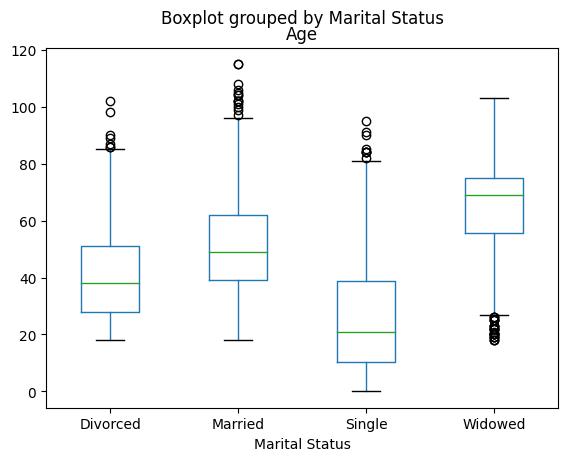

In [46]:
data.boxplot(by ='Marital Status', column ='Age', grid = False)

In [47]:
data[(data['Age'] < 20) & (data['Marital Status'] == 'Widowed')]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
466,466,4,Long Canyon,Amber,Jones,18,Daughter,Widowed,Female,Student,None,Christian
1588,1588,136,Glasgow Street,Sophie,Roberts,18,Daughter,Widowed,Female,Student,None,Christian
3256,3256,6,Templeshy Street,Helen,Parker,18,Head,Widowed,Female,Student,None,None
3590,3590,91,Robinson Drive,Melissa,Francis,19,Head,Widowed,Female,University Student,None,Christian
4860,4860,70,March Bridge,Christopher,Cooke,19,Son,Widowed,Male,University Student,None,Christian
6091,6091,14,Russell Drive,Julian,Ali,19,Son,Widowed,Male,Materials engineer,None,None
6554,6554,138,Russell Drive,Debra,Thompson,19,Daughter,Widowed,Female,University Student,None,Christian


In [48]:
data[(data['Age'] > 108)]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4332,4332,20,Chapman Avenue,Brandon,Cooper,115,Head,Married,Male,Retired Tax inspector,None,None
4333,4333,20,Chapman Avenue,Sharon,Cooper,115,Wife,Married,Female,Retired Museum/gallery exhibitions officer,None,None


In [49]:
##drop these record as they are outliers
data.drop(data[(data['Age'] > 108)].index, inplace=True)

In [50]:
###confirm dropped rows
data[(data['Age'] > 108)]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [51]:
##add age band column for population pyramid
age_band = []
# male_count = []
# female_count = []
for line in data['Age']:
    if line in range(0,6):
        age_band.append('0 - 5')
    elif line in range(6,11):
        age_band.append('6 - 10')
    elif line in range(11,16):
        age_band.append('11 - 15')
    elif line in range(16,21):
        age_band.append('16 - 20')
    elif line in range(21,26):
        age_band.append('21 - 25')
    elif line in range(26,31):
        age_band.append('26 - 30')
    elif line in range(31,36):
        age_band.append('31 - 35')
    elif line in range(36,41):
        age_band.append('36 - 40')
    elif line in range(41,46):
        age_band.append('41 - 45')
    elif line in range(46,51):
        age_band.append('46 - 50')
    elif line in range(51,56):
        age_band.append('51 - 55')
    elif line in range(56,61):
        age_band.append('56 - 60')
    elif line in range(61,66):
        age_band.append('61 - 65')
    elif line in range(66,71):
        age_band.append('66 - 70')
    elif line in range(71,76):
        age_band.append('71 - 75')
    elif line in range(76,81):
        age_band.append('76 - 80')
    elif line in range(81,86):
        age_band.append('81 - 85')
    elif line in range(86,91):
        age_band.append('85 - 90')
    elif line in range(91,96):
        age_band.append('91 - 95')
    else:
        age_band.append('96+')

In [52]:
age_band

['51 - 55',
 '6 - 10',
 '51 - 55',
 '51 - 55',
 '41 - 45',
 '46 - 50',
 '11 - 15',
 '11 - 15',
 '6 - 10',
 '16 - 20',
 '16 - 20',
 '26 - 30',
 '36 - 40',
 '36 - 40',
 '11 - 15',
 '6 - 10',
 '46 - 50',
 '46 - 50',
 '16 - 20',
 '76 - 80',
 '76 - 80',
 '46 - 50',
 '46 - 50',
 '11 - 15',
 '76 - 80',
 '61 - 65',
 '31 - 35',
 '66 - 70',
 '56 - 60',
 '61 - 65',
 '26 - 30',
 '26 - 30',
 '16 - 20',
 '16 - 20',
 '16 - 20',
 '21 - 25',
 '16 - 20',
 '16 - 20',
 '21 - 25',
 '21 - 25',
 '31 - 35',
 '36 - 40',
 '0 - 5',
 '0 - 5',
 '76 - 80',
 '81 - 85',
 '36 - 40',
 '36 - 40',
 '36 - 40',
 '0 - 5',
 '0 - 5',
 '0 - 5',
 '31 - 35',
 '56 - 60',
 '61 - 65',
 '31 - 35',
 '26 - 30',
 '26 - 30',
 '41 - 45',
 '36 - 40',
 '51 - 55',
 '56 - 60',
 '16 - 20',
 '51 - 55',
 '56 - 60',
 '71 - 75',
 '76 - 80',
 '41 - 45',
 '41 - 45',
 '31 - 35',
 '6 - 10',
 '0 - 5',
 '41 - 45',
 '36 - 40',
 '56 - 60',
 '51 - 55',
 '41 - 45',
 '0 - 5',
 '0 - 5',
 '31 - 35',
 '31 - 35',
 '0 - 5',
 '51 - 55',
 '46 - 50',
 '51 - 55',
 '

In [53]:
data['Age Band'] = age_band
data

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band
0,0,1,Guildfast Lane,June,Cooper,52,Head,Divorced,Female,Unemployed,None,Christian,51 - 55
1,1,1,Guildfast Lane,Rita,Cooper,10,Daughter,Single,Female,Student,None,None,6 - 10
2,2,2,Guildfast Lane,Melanie,Atkinson,52,Head,Married,Female,"Producer, television/film/video",None,Catholic,51 - 55
3,3,2,Guildfast Lane,Stuart,Atkinson,53,Husband,Married,Male,Aid worker,None,Christian,51 - 55
4,4,3,Guildfast Lane,Donna,Finch,44,Head,Married,Female,Translator,None,None,41 - 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,10589,1,Edwards Granary,Luke,Robinson,13,Grandson,Single,Male,Student,None,None,11 - 15
10590,10590,1,Edwards Granary,Molly,Roberts,11,Granddaughter,Single,Female,Student,None,None,11 - 15
10591,10591,1,Edwards Granary,Marilyn,Roberts,10,Granddaughter,Single,Female,Student,None,None,6 - 10
10592,10592,1,July Cottage,Robin,Rogers,76,Head,Married,Male,"Retired Sales professional, IT",None,Christian,76 - 80


In [54]:
data.groupby([ 'Gender', 'Age Band']).size()

Gender  Age Band
Female  0 - 5       410
        11 - 15     392
        16 - 20     464
        21 - 25     370
        26 - 30     360
        31 - 35     490
        36 - 40     487
        41 - 45     471
        46 - 50     403
        51 - 55     324
        56 - 60     299
        6 - 10      404
        61 - 65     221
        66 - 70     180
        71 - 75     138
        76 - 80      85
        81 - 85      59
        85 - 90      25
        91 - 95       6
        96+          10
Male    0 - 5       392
        11 - 15     395
        16 - 20     404
        21 - 25     349
        26 - 30     376
        31 - 35     348
        36 - 40     385
        41 - 45     371
        46 - 50     338
        51 - 55     296
        56 - 60     242
        6 - 10      419
        61 - 65     213
        66 - 70     161
        71 - 75     122
        76 - 80      81
        81 - 85      52
        85 - 90      37
        91 - 95       2
        96+          11
dtype: int64

In [55]:
##simplify the occupation field to get better visualisation
simplified_occupation = []
for line in data['Occupation']:
    if line.find('Retired') != -1:
        simplified_occupation.append('Retired')
    elif line == 'Unemployed':
        simplified_occupation.append('Unemployed')
    elif line.find('Student') != -1:
        simplified_occupation.append(line)
    elif line == 'Child':
        simplified_occupation.append(line)
    else:
        simplified_occupation.append('Employed')
        
        

In [56]:
simplified_occupation

['Unemployed',
 'Student',
 'Employed',
 'Employed',
 'Employed',
 'Employed',
 'Student',
 'Student',
 'Student',
 'Employed',
 'University Student',
 'Employed',
 'Employed',
 'Employed',
 'Student',
 'Student',
 'Employed',
 'Employed',
 'Student',
 'Retired',
 'Retired',
 'Employed',
 'Employed',
 'Student',
 'Retired',
 'Employed',
 'Employed',
 'Employed',
 'Employed',
 'Employed',
 'Employed',
 'Employed',
 'University Student',
 'University Student',
 'University Student',
 'University Student',
 'University Student',
 'University Student',
 'PhD Student',
 'University Student',
 'Employed',
 'Employed',
 'Child',
 'Child',
 'Retired',
 'Retired',
 'Employed',
 'Employed',
 'Unemployed',
 'Student',
 'Child',
 'Child',
 'Employed',
 'Employed',
 'Employed',
 'Employed',
 'Employed',
 'Employed',
 'Employed',
 'Employed',
 'Employed',
 'Unemployed',
 'Student',
 'Employed',
 'Employed',
 'Retired',
 'Retired',
 'Employed',
 'Employed',
 'Employed',
 'Student',
 'Child',
 'Employ

In [57]:
#Add it to the data frame
data['Simplified Occupation'] = simplified_occupation

In [58]:
data['Simplified Occupation'].unique()

array(['Unemployed', 'Student', 'Employed', 'University Student',
       'Retired', 'PhD Student', 'Child'], dtype=object)

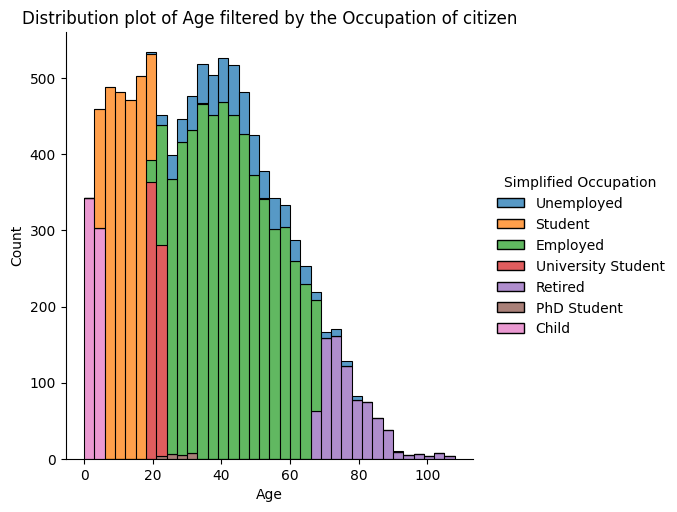

In [59]:
##plot a hist (bar) graph to check the relationship of age and occupation
##Plot against simplfied occupation
sns.displot(data=data, x='Age', hue='Simplified Occupation',multiple = 'stack').set(title='Distribution plot of Age filtered by the Occupation of citizen')

In [60]:
## age over 65 that is unemployed converted to retired
data.loc[(data['Age'] > 65) & (data['Occupation'] == 'Unemployed'),'Occupation'] = 'Retired'

In [61]:
data.loc[(data['Age'] > 65) & (data['Occupation'] == 'Unemployed')]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band,Simplified Occupation


In [62]:
## Drop unknown column Unnamed: 0
data.drop('Unnamed: 0', inplace=True, axis=1) 

In [63]:
data['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [64]:
#convert 'Nine' to 9
data['House Number'].replace(['Nine'], 9, inplace = True)

In [65]:
data['House Number'] = data['House Number'].astype(int)
data['House Number']

0        1
1        1
2        2
3        2
4        3
        ..
10589    1
10590    1
10591    1
10592    1
10593    1
Name: House Number, Length: 10592, dtype: int32

In [66]:
house_num = []
for key,value in zip(data['House Number'],data['Street']):
    a = str(key)+' '+value
    num=0
    count=1
    for k,v in zip(data['House Number'],data['Street']):
        b = str(k)+' '+v
        #print (a,b)
        if a == b:
            #print('yes')
            num = num + 1
        if count == len(data['House Number']):
            house_num.append(num)
        count = count + 1

In [67]:
len(house_num)

10592

In [68]:
house_num

[2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 1,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 1,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 1,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 1,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 4,
 4,
 4,
 1,
 5,
 5,
 5,
 5,
 5,
 1,
 6,
 6,


In [69]:
data['Household Number'] = house_num

In [70]:
babies = len(data[data['Age'] == 0])
totalpopulation = len(data)
## calculting birth rate per 1000
birth_rate = babies/totalpopulation * 1000
birth_rate

11.23489425981873

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10592 entries, 0 to 10593
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10592 non-null  int32 
 1   Street                         10592 non-null  object
 2   First Name                     10592 non-null  object
 3   Surname                        10592 non-null  object
 4   Age                            10592 non-null  int32 
 5   Relationship to Head of House  10592 non-null  object
 6   Marital Status                 10592 non-null  object
 7   Gender                         10592 non-null  object
 8   Occupation                     10592 non-null  object
 9   Infirmity                      10592 non-null  object
 10  Religion                       10592 non-null  object
 11  Age Band                       10592 non-null  object
 12  Simplified Occupation          10592 non-null  object
 13  H

In [72]:
data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band,Simplified Occupation,Household Number
0,1,Guildfast Lane,June,Cooper,52,Head,Divorced,Female,Unemployed,None,Christian,51 - 55,Unemployed,2
1,1,Guildfast Lane,Rita,Cooper,10,Daughter,Single,Female,Student,None,None,6 - 10,Student,2
2,2,Guildfast Lane,Melanie,Atkinson,52,Head,Married,Female,"Producer, television/film/video",None,Catholic,51 - 55,Employed,2
3,2,Guildfast Lane,Stuart,Atkinson,53,Husband,Married,Male,Aid worker,None,Christian,51 - 55,Employed,2
4,3,Guildfast Lane,Donna,Finch,44,Head,Married,Female,Translator,None,None,41 - 45,Employed,5


In [85]:
data[(data['Relationship to Head of House'] == 'Lodger') ].sort_values(by=['Household Number'])

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band,Simplified Occupation,Household Number
957,34,Foster Street,Kimberley,Hunter,59,Lodger,Single,Female,Patent examiner,None,Christian,56 - 60,Employed,2
8815,44,Martin Street,Conor,Evans,18,Lodger,Divorced,Male,Student,None,None,16 - 20,Student,2
1826,18,Arrows Street,Nathan,Jackson,24,Lodger,Single,Male,Diagnostic radiographer,None,Christian,21 - 25,Employed,2
5727,10,Bassenthwaitecurl Avenue,Maria,Holmes,36,Lodger,Single,Female,Commercial horticulturist,None,None,36 - 40,Employed,2
4000,6,Sydney Skyway,Lucy,Baker,30,Lodger,Single,Female,Psychiatrist,None,None,26 - 30,Employed,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,173,March Bridge,Jack,Phillips,40,Lodger,Single,Male,"Engineer, production",None,None,36 - 40,Employed,22
5496,173,March Bridge,Maurice,Phillips,25,Lodger,Single,Male,"Administrator, sports",None,Muslim,21 - 25,Employed,22
5497,173,March Bridge,Kate,Rose,32,Lodger,Single,Female,Psychotherapist,None,None,31 - 35,Employed,22
5499,173,March Bridge,Jessica,Roberts,63,Lodger,Divorced,Female,Holiday representative,None,Christian,61 - 65,Employed,22


In [86]:
data[(data['Relationship to Head of House'] == 'Visitor') ].sort_values(by=['Household Number'])

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band,Simplified Occupation,Household Number
2011,38,Stoke Drive,Suzanne,Taylor,31,Visitor,Divorced,Female,Mechanical engineer,None,Methodist,31 - 35,Employed,2
6755,95,Stevens Brook,Julia,Slater,34,Visitor,Divorced,Female,"Designer, interior/spatial",None,Methodist,31 - 35,Employed,3
6709,67,Stevens Brook,Carol,Martin,54,Visitor,Divorced,Female,Community arts worker,None,Catholic,51 - 55,Employed,3
7679,1,Bell Ville,Molly,Green,36,Visitor,Single,Female,Furniture designer,None,Christian,36 - 40,Employed,4
1258,37,Glasgow Street,Naomi,Roberts,52,Visitor,Single,Female,Regulatory affairs officer,None,Christian,51 - 55,Employed,4
2171,21,Williams Lodge,Bethan,Patel,43,Visitor,Single,Female,Marine scientist,None,None,41 - 45,Employed,4
2174,22,Williams Lodge,Charlie,Curtis,32,Visitor,Single,Male,Unemployed,None,Catholic,31 - 35,Unemployed,4
5798,9,Telegraph Circle,Tony,O'Sullivan,31,Visitor,Single,Male,Clinical psychologist,None,Christian,31 - 35,Employed,4
9624,141,Jones Villages,Geraldine,Simpson,34,Visitor,Single,Female,"Production assistant, television",None,Catholic,31 - 35,Employed,4
7051,7,Hangar Road,Clive,Doyle,64,Visitor,Single,Male,Retail banker,None,Christian,61 - 65,Employed,5


[Text(0.5, 1.0, 'Scatter plot of the Age against the Relationship to the Head of House')]

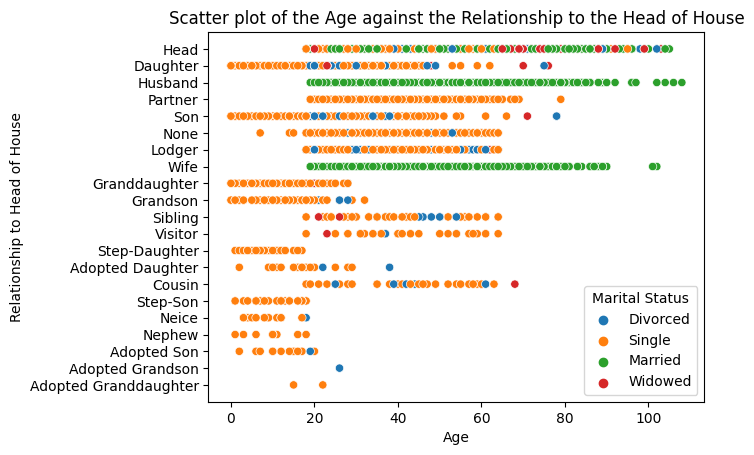

In [73]:
sns.scatterplot(data=data, x='Age', y='Relationship to Head of House', hue='Marital Status').set(title='Scatter plot of the Age against the Relationship to the Head of House')

In [74]:
## Get the unique age band data
age_band  = data['Age Band'].unique().tolist()
age_band.sort()
age_band

['0 - 5',
 '11 - 15',
 '16 - 20',
 '21 - 25',
 '26 - 30',
 '31 - 35',
 '36 - 40',
 '41 - 45',
 '46 - 50',
 '51 - 55',
 '56 - 60',
 '6 - 10',
 '61 - 65',
 '66 - 70',
 '71 - 75',
 '76 - 80',
 '81 - 85',
 '85 - 90',
 '91 - 95',
 '96+']

In [75]:
## Get the count of the male and female of each age band 
male = []
female = []
for line in age_band:
    male.append(len(data[(data['Gender'] ==  'Male') & (data['Age Band'] == line)]))
    female.append(-len(data[(data['Gender'] ==  'Female') & (data['Age Band'] == line)]))

In [76]:
print(male)
print(female)

[392, 395, 404, 349, 376, 348, 385, 371, 338, 296, 242, 419, 213, 161, 122, 81, 52, 37, 2, 11]
[-410, -392, -464, -370, -360, -490, -487, -471, -403, -324, -299, -404, -221, -180, -138, -85, -59, -25, -6, -10]


In [77]:
 ## Create a new dataframe from the new data
population = pd.DataFrame({'Age': age_band, 
                    'Male': male, 
                    'Female': female})

[Text(0.5, 0, 'Population'),
 Text(0, 0.5, 'Age-Group'),
 Text(0.5, 1.0, 'Population Pyramid')]

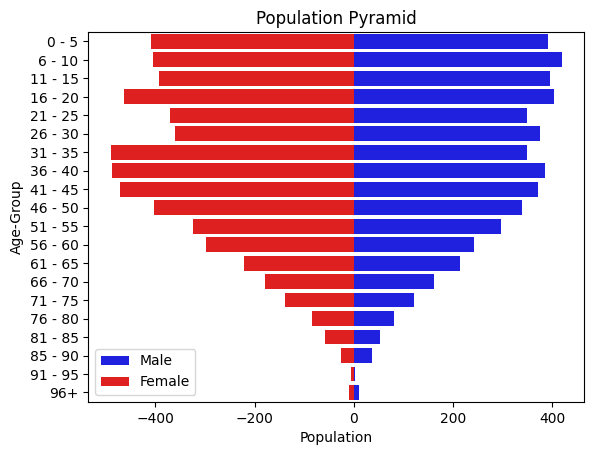

In [78]:
## Set the order for the poplulation pyramid
order = ['0 - 5', '6 - 10',
 '11 - 15',
 '16 - 20',
 '21 - 25',
 '26 - 30',
 '31 - 35',
 '36 - 40',
 '41 - 45',
 '46 - 50',
 '51 - 55',
 '56 - 60',
 '61 - 65',
 '66 - 70',
 '71 - 75',
 '76 - 80',
 '81 - 85',
 '85 - 90',
 '91 - 95',
 '96+']
bar_plot = sns.barplot(x='Male', y='Age', data=population, order=order, label='Male', color='blue')
bar_plot = sns.barplot(x='Female', y='Age', data=population, order=order, label='Female', color='red')
bar_plot.legend()
bar_plot.set(xlabel="Population", ylabel="Age-Group", title = "Population Pyramid")

In [79]:
my_report = sv.analyze(data)
my_report.show_html()

C:\Users\675399\AppData\Roaming\Python\Python39\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\675399\AppData\Roaming\Python\Python39\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\675399\AppData\Roaming\Python\Python39\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\675399\AppData\Roaming\Python\Python39\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\675399\AppData\Roaming\Python\Python39\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\675399\AppData\Roaming\Python\Python39\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be r

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Check Religion CORRELATION WITH Age

[Text(0.5, 1.0, 'Religion CORRELATION WITH Age')]

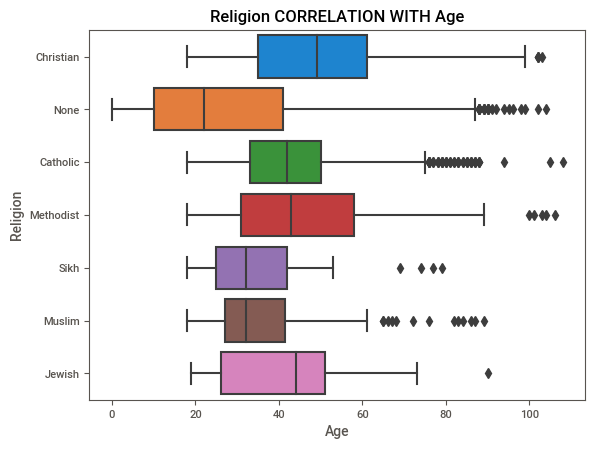

In [80]:
sns.boxplot(data=data, x='Age', y='Religion').set(title='Religion CORRELATION WITH Age')

[Text(0.5, 1.0, 'Marital status by Age distribution')]

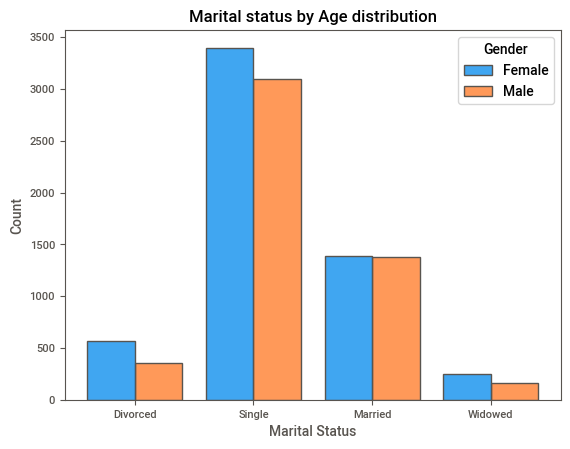

In [81]:
sns.histplot(data=data, x='Marital Status', hue='Gender', multiple='dodge', shrink=.8).set(title='Marital status by Age distribution')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '0 - 5'),
  Text(1, 0, '11 - 15'),
  Text(2, 0, '16 - 20'),
  Text(3, 0, '21 - 25'),
  Text(4, 0, '26 - 30'),
  Text(5, 0, '31 - 35'),
  Text(6, 0, '36 - 40'),
  Text(7, 0, '41 - 45'),
  Text(8, 0, '46 - 50'),
  Text(9, 0, '51 - 55'),
  Text(10, 0, '56 - 60'),
  Text(11, 0, '6 - 10'),
  Text(12, 0, '61 - 65'),
  Text(13, 0, '66 - 70'),
  Text(14, 0, '71 - 75'),
  Text(15, 0, '76 - 80'),
  Text(16, 0, '81 - 85'),
  Text(17, 0, '85 - 90'),
  Text(18, 0, '91 - 95'),
  Text(19, 0, '96+')])

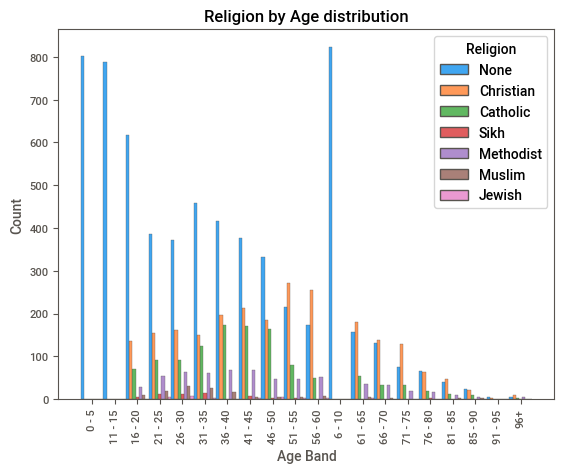

In [82]:
sns.histplot(data=data.sort_values(by=['Age Band']), x='Age Band', hue='Religion', multiple='dodge').set(title='Religion by Age distribution')
plt.xticks(rotation =90)

[Text(0.5, 1.0, 'Box plot of the Household number against the Relationship to the Head of House')]

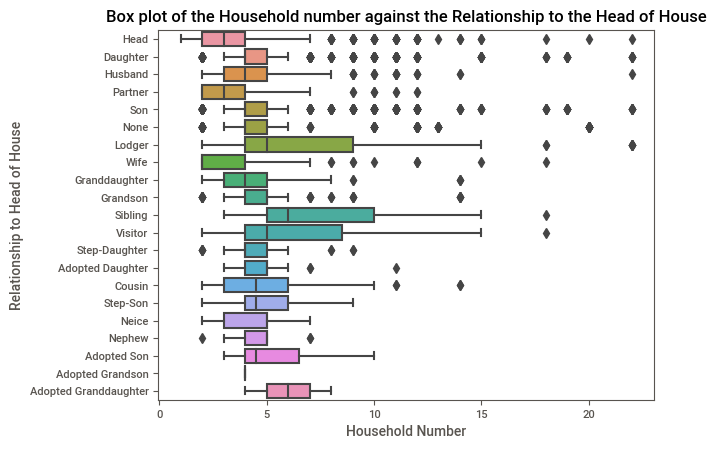

In [96]:
sns.boxplot(data=data, x='Household Number', y='Relationship to Head of House').set(title='Box plot of the Household number against the Relationship to the Head of House')

In [97]:
##checking the median of household number
data.describe()

,House Number,Age,Household Number
count,10592.000000,10592.000000,10592.000000
mean,49.172300,34.792296,4.283233
std,50.288621,21.342478,2.704750
min,1.000000,0.000000,1.000000
25%,11.000000,17.000000,3.000000
50%,29.000000,34.000000,4.000000
75%,76.000000,50.000000,5.000000
max,201.000000,108.000000,22.000000


In [110]:
#getting the "commuters "
commuters = data[((data['Relationship to Head of House'] == 'Lodger') & (data['Simplified Occupation'] == 'Employed'))|(data['Relationship to Head of House'] == 'Visitor')|((data['Simplified Occupation'] == 'University Student')|(data['Simplified Occupation'] == 'PhD Student'))]
commuters

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band,Simplified Occupation,Household Number
10,4,Guildfast Lane,Hugh,Davies,19,Partner,Single,Male,University Student,None,Catholic,16 - 20,University Student,2
32,9,Hall Lane,Gail,Scott,19,Head,Single,Female,University Student,None,None,16 - 20,University Student,3
33,9,Hall Lane,Valerie,Edwards,20,None,Single,Female,University Student,None,Christian,16 - 20,University Student,3
34,9,Hall Lane,Jonathan,Woods,18,None,Single,Male,University Student,None,None,16 - 20,University Student,3
35,10,Hall Lane,Norman,Bennett,22,Head,Single,Male,University Student,None,Catholic,21 - 25,University Student,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10565,1,O'Sullivan Commune,Ian,Abbott,52,Lodger,Single,Male,Tax inspector,None,Christian,51 - 55,Employed,12
10567,1,Jones Tower,Diana,Marsh,20,Daughter,Single,Female,University Student,None,None,16 - 20,University Student,5
10568,1,Jones Tower,Sarah,Marsh,20,Daughter,Divorced,Female,University Student,None,None,16 - 20,University Student,5
10581,1,Barber Keep,Valerie,Pratt,22,Granddaughter,Single,Female,University Student,None,None,21 - 25,University Student,6


In [113]:
##calculating the percetage to the total population
commuters_no = len(commuters)
(commuters_no/totalpopulation) * 100

10.375755287009063